<a href="https://colab.research.google.com/github/Gaurav1401/Deep-Learning/blob/main/Practice/CNN/TMLC/102_Category_Flower_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
from matplotlib.image import imread
import glob

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [5]:
image_path = '/content/gdrive/MyDrive/Datasets/tmlc/oxford-102-flowers/' 

**Accessing the image file names and the target from the text file**

In [6]:
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(p[0])
            y.append(int(p[1]))

    return x, y

In [7]:
X_train, y_train = Read_Two_Column_File('/content/gdrive/MyDrive/Datasets/tmlc/oxford-102-flowers/train.txt')
X_valid, y_valid = Read_Two_Column_File("/content/gdrive/MyDrive/Datasets/tmlc/oxford-102-flowers/valid.txt")

In [8]:
len(X_train)

1020

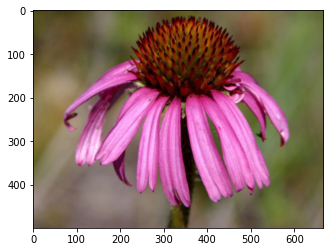

In [9]:
plt.imshow(imread(image_path + X_train[0]))

In [10]:
train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis = 'columns')
train.columns = ["path", "category"]

valid = pd.concat([pd.DataFrame(X_valid), pd.DataFrame(y_valid)], axis = 'columns')
valid.columns = ["path", "category"]

In [11]:
valid.head()

,path,category
0,jpg/image_04467.jpg,89
1,jpg/image_07129.jpg,44
2,jpg/image_05166.jpg,4
3,jpg/image_07002.jpg,34
4,jpg/image_02007.jpg,79


In [12]:
train.head()

,path,category
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [13]:
len(train['category'].unique())

102

In [21]:
train = pd.read_csv("train.csv")
valid = pd.read_csv("valid.csv")

**Since, I am working on google colab so changing the path each of the image as all the images are in the google drive**

In [22]:
train.head()

,Unnamed: 0,path,category
0,0,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,16
1,1,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,13
2,2,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,42
3,3,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,55
4,4,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,96


In [23]:
train.drop("Unnamed: 0", axis = 'columns', inplace = True)
valid.drop("Unnamed: 0", axis = 'columns', inplace = True)

In [15]:
# train['path'] = train.agg(lambda x: f"{image_path}{x['path']}", axis=1)
# valid['path'] = valid.agg(lambda x: f"{image_path}{x['path']}", axis=1)

In [16]:
# from google.colab import files
# train.to_csv('train.csv') 
# files.download('train.csv')

# valid.to_csv('valid.csv') 
# files.download('valid.csv')

In [24]:
train.head()

,path,category
0,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,16
1,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,13
2,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,42
3,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,55
4,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,96


In [25]:
import tensorflow as tf

**Here, I am replacing the path of the image with the array of pixels associated with it**

In [26]:
def img_to_array(path):
  img = tf.keras.preprocessing.image.load_img(path)
  return tf.keras.preprocessing.image.img_to_array(img)

In [ ]:
# train['path'] = train['path'].apply(img_to_array)
# valid['path'] = valid['path'].apply(img_to_array)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      1020 non-null   object
 1   category  1020 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ KB


**Saving the data in .npz file**

In [28]:
# np.savez("train_data", inputs = train['path'], targets = train['category'])
# np.savez("valid_data", inputs = valid['path'], targets = valid['category'])

In [29]:
from google.colab import files
# train.to_csv('train_tensors.csv') 
# files.download('train_data.npz')

# valid.to_csv('valid_tensors.csv') 
# files.download('valid_data.npz')

### **Loading the updated data**

In [30]:
train_tensor = np.load("train_data.npz", allow_pickle=True)
valid_tensor = np.load("valid_data.npz", allow_pickle=True)

In [31]:
X_train = train_tensor['inputs']
y_train = train_tensor['targets']

In [32]:
X_valid = valid_tensor['inputs']
y_valid = valid_tensor['targets']

**Checking variation in the dimensions of the images**

In [33]:
dim1 = []
dim2 = []

for img in X_train:
  # img = imread(image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

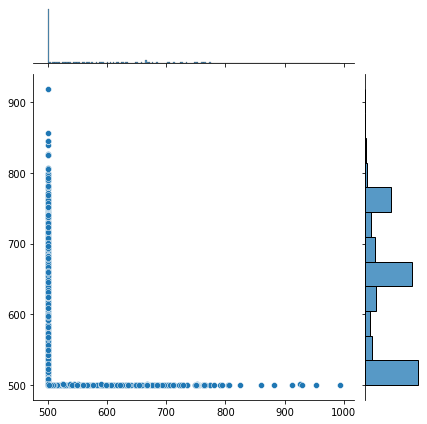

In [34]:
sns.jointplot(dim1, dim2)

**It shows that the images that we have are having different dimensions**

In [35]:
X_train[0].max(), X_train[0].min()

(255.0, 0.0)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
train_data_gen = ImageDataGenerator(rotation_range=20,
                               rescale = 1./255,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest')

valid_data_gen = ImageDataGenerator(rescale = 1./255)

In [38]:
train.head()

,path,category
0,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,16
1,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,13
2,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,42
3,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,55
4,/content/gdrive/MyDrive/Datasets/tmlc/oxford-1...,96


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [40]:
image_shape = (130, 130, 3)

### **Preparing the model**

In [41]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(102, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

**Scaling the images**

In [43]:
X_train = X_train/255
X_valid = X_valid/255

In [50]:
X_train.shape, X_valid.shape

((1020,), (1020,))

In [59]:
X_valid[0].shape

(621, 500, 3)

**Using Early Stopping method to prevent overfitting**

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      1020 non-null   object
 1   category  1020 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ KB


# **Below You can see now that I am stuck :(**

In [81]:
df = pd.DataFrame()

In [82]:
df['train'] = X_train
df['valid'] = X_valid

In [83]:
def reshape(row):
  return row.reshape(130, 130, 3)

In [84]:
df['train'] = df['train'].apply(reshape)

ValueError: ignored

In [88]:
df['train'][10].shape

(750, 500, 3)

In [73]:
model.fit(X_train, y_train, epochs=15)

ValueError: ignored